# **In this assignment students will build the random forest model after**
# **normalizing the variable to house pricing from boston data set.** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold, GridSearchCV,cross_val_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [2]:
print("Data size: ",boston.data.shape)
print("Column names: ",boston.feature_names)

Data size:  (506, 13)
Column names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print("Converting to pandas Dataframe")
bst = pd.DataFrame(boston.data,columns=boston.feature_names)
bst['PRICE'] = targets
bst.head()

Converting to pandas Dataframe


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print("Summary of the statistics for the dataset")
bst[boston.feature_names].describe()

Summary of the statistics for the dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
print("Summary of the statistics for the target")
bst['PRICE'].describe()

Summary of the statistics for the target


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

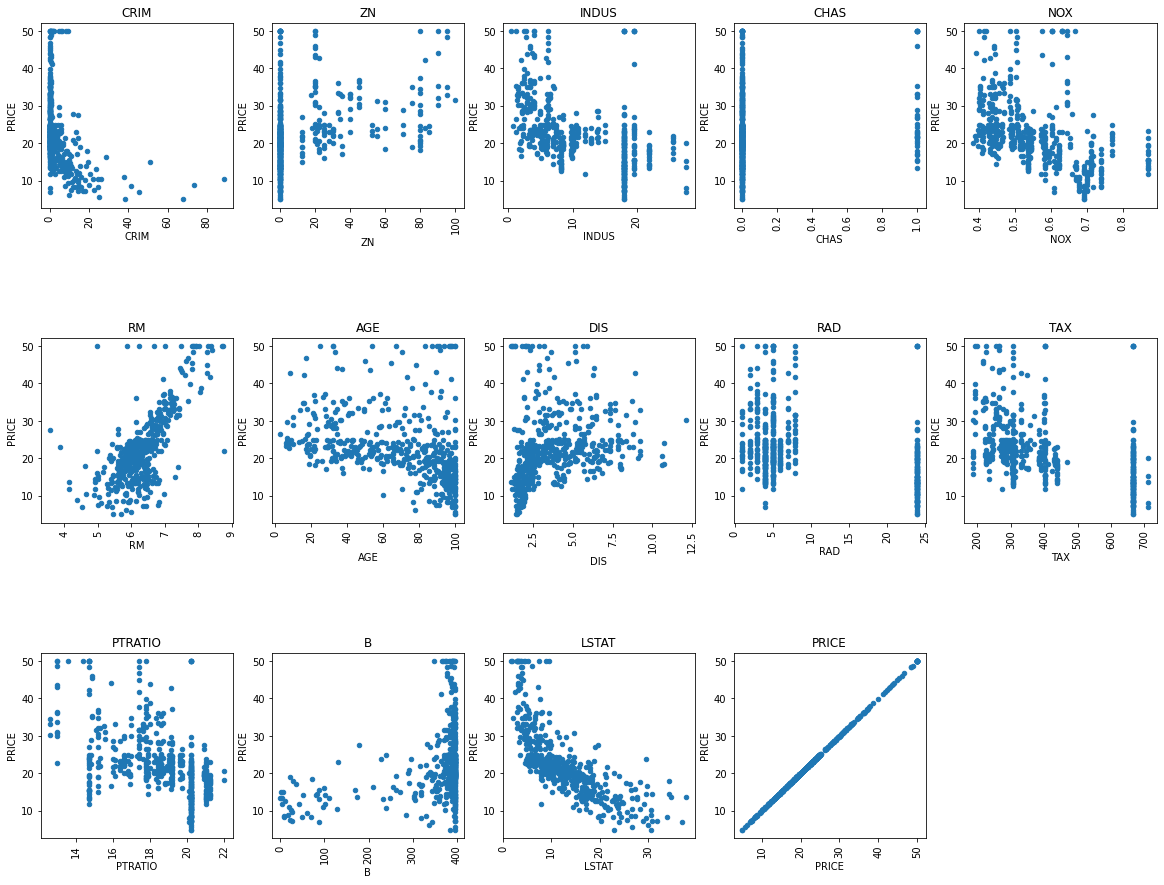

In [6]:
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(bst.shape[1])/cols)
for i,c in enumerate(bst.columns):
  axs = fig.add_subplot(rows,cols,i+1)
  axs.set_title(c)

  bst.plot(kind = 'scatter',x=c,y='PRICE',ax=axs)
  plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)  

In [7]:
y =bst['PRICE']
X = bst.drop('PRICE',axis=1)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_scaler = StandardScaler()
y_train  = y_scaler.fit_transform(y_train[:,None])[:,0]
y_test = y_scaler.transform(y_test[:,None])[:,0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


In [9]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
y_pred = model.predict(X_test)
print("Test R2 score: ",format(metrics.r2_score(y_test,y_pred)))
print("MSE score",format(metrics.mean_squared_error(y_test,y_pred),'.5f'))

Test R2 score:  0.8302420697900313
MSE score 0.16676


In [11]:
parameters ={'min_samples_split':[2,5,10],
             'max_depth':[None,2,5,10],
             'min_samples_leaf':[1,3,5],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[50,75,100]
    
}
grdcv = GridSearchCV(RandomForestRegressor(),param_grid=parameters,n_jobs=-1,verbose=1)
grdcv.fit(X_train,y_train)
print("Best estimators: ")
print(grdcv.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.3min


Best estimators: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  3.0min finished


In [12]:
print("Test Accuracy")
y_pred = grdcv.predict(X_test)
print("R2 score",format(metrics.r2_score(y_test,y_pred),'.2f'))
print("MSE:",format(metrics.mean_squared_error(y_test,y_pred),'.2f'))

Test Accuracy
R2 score 0.75
MSE: 0.24


In [14]:
print("From above results we can see that the hyperparameter reduced the R2 value and increased MSE value we can conclude that with best parameters and data being so small model has learned too much")

From above results we can see that the hyperparameter reduced the R2 value and increased MSE value we can conclude that with best parameters and data being so small model has learned too much
